## What are the difference in salary for different data jobs and data skills?

Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Clean Up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)

In [3]:
df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg'])

In [5]:
job_titles = df_US['job_title_short'].value_counts().head(6).index.tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [23]:
df_filtered = df_US[df_US['job_title_short'].isin(job_titles)]
job_order = df_filtered.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.tolist()
job_order

['Senior Data Scientist',
 'Senior Data Engineer',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Analyst',
 'Data Analyst']

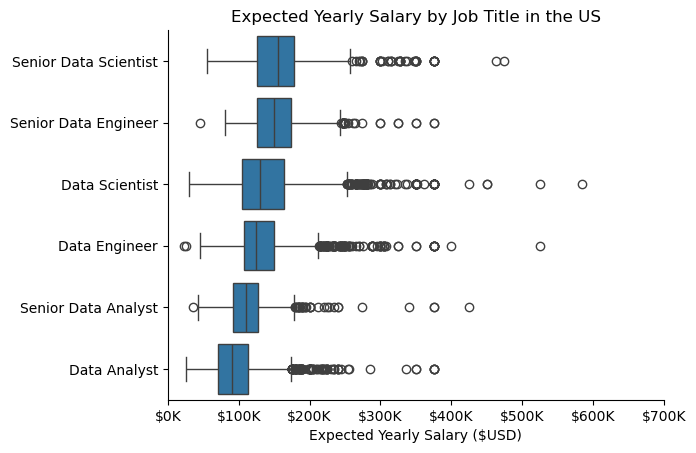

In [ ]:
sns.boxplot(data=df_filtered, x='salary_year_avg', y='job_title_short', order=job_order)
plt.ylabel('')
plt.xlabel('Expected Yearly Salary ($USD)')
ticks_x = plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.xlim(0, 700000)
plt.title('Expected Yearly Salary by Job Title in the US')
sns.despine()

plt.show()